## **Customer Segmentation Using RFM Analysis**

## **Overview**
**This notebook performs customer segmentation using RFM (Recency, Frequency, Monetary) analysis on the Online Retail Dataset from UCI. We'll analyze customer behavior and create targeted marketing strategies for different customer segments**.

## Dataset Information
- **Source**: UCI Machine Learning Repository - Online Retail Dataset
- **Description**: Contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based online retail company
- **Columns**: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
# You can download from: https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
df = pd.read_excel('Online Retail.xlsx')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)
print("\nFirst few rows:")
df.head()

Dataset Shape: (541909, 8)

Column Names: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Data Types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

First few rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic Statistics:")
df.describe()

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Basic Statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## 3. Data Preprocessing

In [4]:
# Remove rows with missing CustomerID
df = df[df['CustomerID'].notna()]

# Remove negative quantities (returns/cancellations)
df = df[df['Quantity'] > 0]

# Remove negative or zero unit prices
df = df[df['UnitPrice'] > 0]

# Create TotalAmount column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("Cleaned dataset shape:", df.shape)
print("Date range:", df['InvoiceDate'].min(), "to", df['InvoiceDate'].max())

Cleaned dataset shape: (397884, 9)
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


## 4. Calculate RFM Metrics

In [5]:
# Set reference date (last date in dataset + 1 day)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference date for RFM calculation:", reference_date)

# Calculate RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalAmount': 'sum'   # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print("RFM dataset shape:", rfm.shape)
rfm.head()

Reference date for RFM calculation: 2011-12-10 12:50:00
RFM dataset shape: (4338, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [6]:
# RFM statistics
print("RFM Statistics:")
print(rfm.describe())

# Check for any extreme values
print("\nCustomers with zero monetary value:", (rfm['Monetary'] == 0).sum())
print("Customers with zero frequency:", (rfm['Frequency'] == 0).sum())

RFM Statistics:
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422    91.720609    2054.266460
std     1721.808492   100.014169   228.785094    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000    17.000000     307.415000
50%    15299.500000    51.000000    41.000000     674.485000
75%    16778.750000   142.000000   100.000000    1661.740000
max    18287.000000   374.000000  7847.000000  280206.020000

Customers with zero monetary value: 0
Customers with zero frequency: 0


## 5. Create RFM Scores

In [7]:
# Create RFM scores (1-5 scale)
# For Recency: lower is better (lower recency = higher score)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# For Frequency: higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# For Monetary: higher is better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Create combined RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,115
1,12347.0,2,182,4310.00,5,5,5,555
2,12348.0,75,31,1797.24,2,3,4,234
3,12349.0,19,73,1757.55,4,4,4,444
4,12350.0,310,17,334.40,1,2,2,122


## 6. Customer Segmentation

In [8]:
# Define customer segments based on RFM scores
def categorize_customer(row):
    """
    Categorize customers based on RFM scores
    """
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 4:
        return 'Loyal Customers'
    elif row['R_Score'] >= 3 and row['F_Score'] <= 2 and row['M_Score'] >= 3:
        return 'Potential Loyalists'
    elif row['R_Score'] >= 4 and row['F_Score'] <= 2:
        return 'New Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] >= 3:
        return 'At Risk'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2:
        return 'Need Attention'
    elif row['R_Score'] <= 1 and row['F_Score'] >= 3:
        return 'Hibernating'
    else:
        return 'Lost Customers'

# Apply segmentation
rfm['Customer_Segment'] = rfm.apply(categorize_customer, axis=1)

# Display segment distribution
segment_counts = rfm['Customer_Segment'].value_counts()
print("Customer Segment Distribution:")
print(segment_counts)

Customer Segment Distribution:
Customer_Segment
Need Attention         1049
Champions               932
Lost Customers          863
At Risk                 659
Loyal Customers         398
New Customers           262
Potential Loyalists     175
Name: count, dtype: int64


In [9]:
# Calculate segment statistics
segment_stats = rfm.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

segment_stats.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']
segment_stats

,Avg_Recency,Avg_Frequency,Avg_Monetary,Customer_Count
Customer_Segment,,,,
At Risk,164.78,71.62,1157.89,659
Champions,13.07,258.87,6089.14,932
Lost Customers,36.81,52.87,483.17,863
Loyal Customers,42.50,107.75,2618.53,398
Need Attention,211.39,13.39,530.88,1049
New Customers,17.64,13.71,249.44,262
Potential Loyalists,32.01,18.72,2239.36,175


## 7. Visualizations

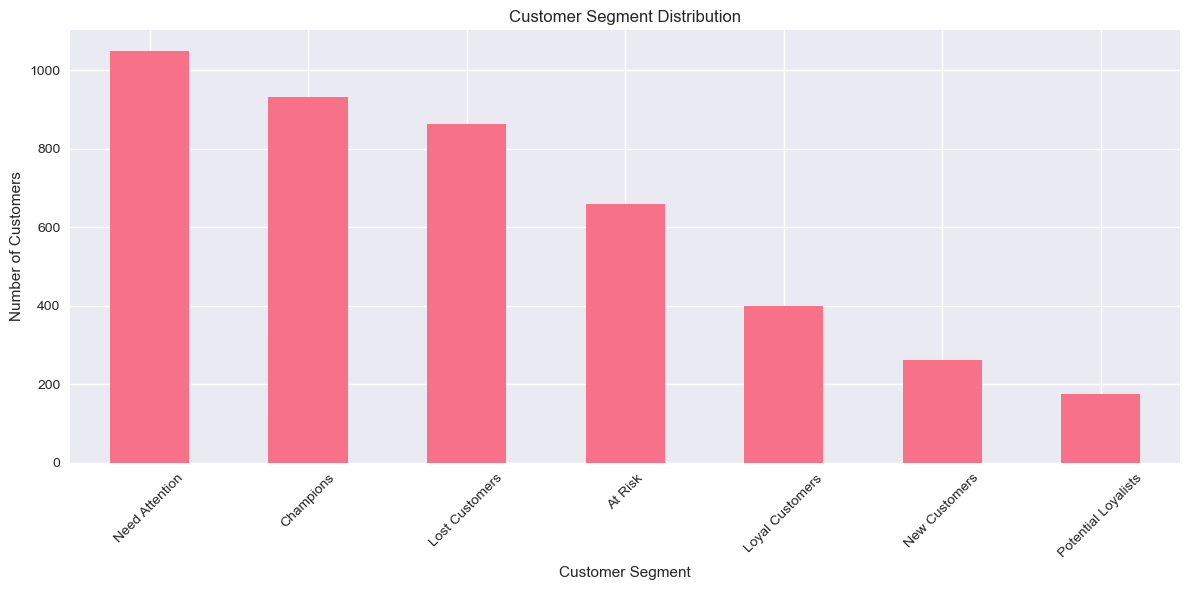

In [10]:
# 1. Customer Segment Distribution
plt.figure(figsize=(12, 6))
segment_counts.plot(kind='bar')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

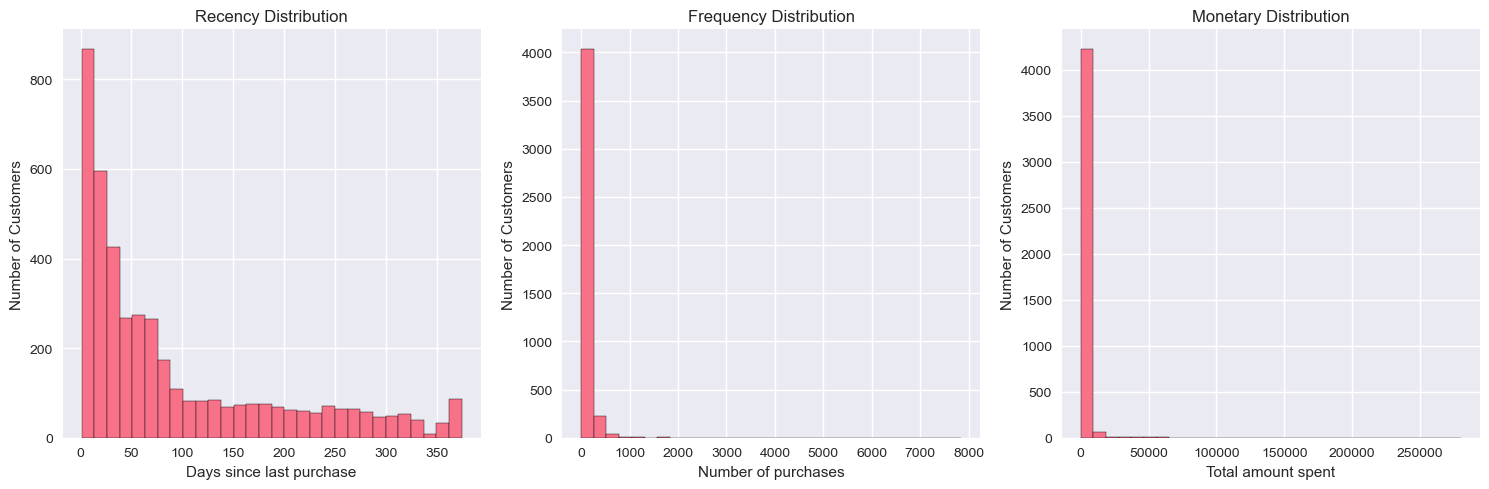

In [11]:
# 2. RFM Score Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Recency distribution
axes[0].hist(rfm['Recency'], bins=30, edgecolor='black')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days since last purchase')
axes[0].set_ylabel('Number of Customers')

# Frequency distribution
axes[1].hist(rfm['Frequency'], bins=30, edgecolor='black')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of purchases')
axes[1].set_ylabel('Number of Customers')

# Monetary distribution
axes[2].hist(rfm['Monetary'], bins=30, edgecolor='black')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total amount spent')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()

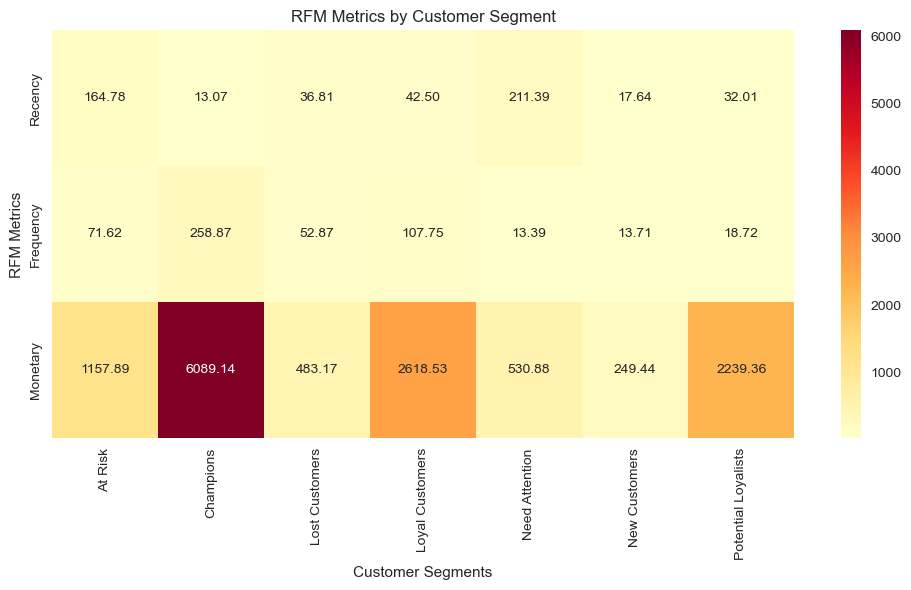

In [12]:
# 3. Segment comparison heatmap
segment_comparison = rfm.groupby('Customer_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

plt.figure(figsize=(10, 6))
sns.heatmap(segment_comparison.T, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('RFM Metrics by Customer Segment')
plt.ylabel('RFM Metrics')
plt.xlabel('Customer Segments')
plt.tight_layout()
plt.show()

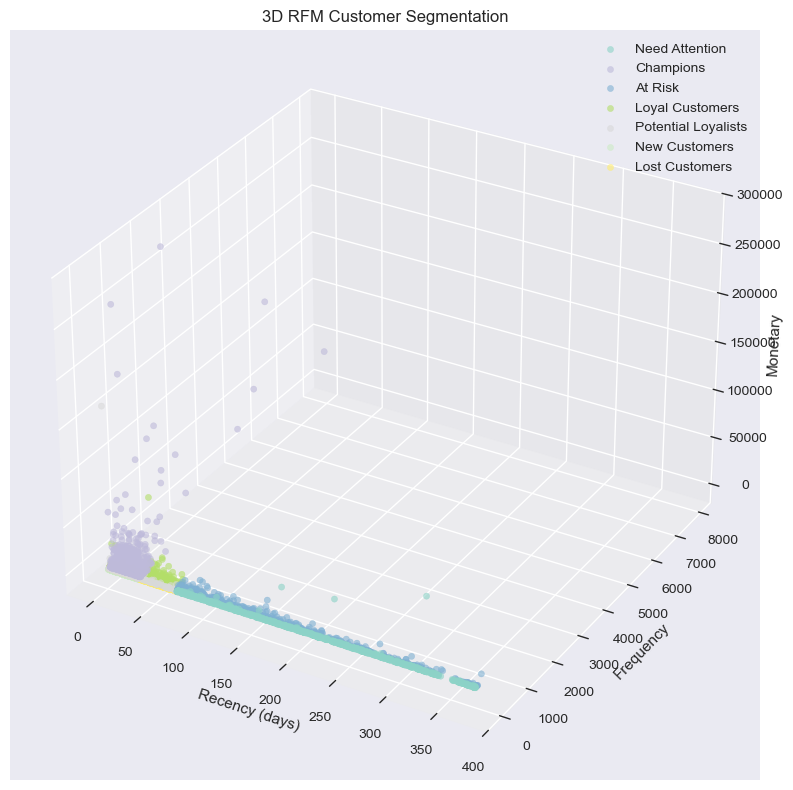

In [13]:
# 4. 3D Scatter plot of RFM segments
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a color map for segments
segments = rfm['Customer_Segment'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(segments)))

for idx, segment in enumerate(segments):
    segment_data = rfm[rfm['Customer_Segment'] == segment]
    ax.scatter(segment_data['Recency'], 
               segment_data['Frequency'], 
               segment_data['Monetary'],
               c=[colors[idx]], 
               label=segment, 
               alpha=0.6)

ax.set_xlabel('Recency (days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D RFM Customer Segmentation')
plt.legend()
plt.tight_layout()
plt.show()

## 8. Marketing Strategies by Segment

In [14]:
# Create marketing strategy recommendations
marketing_strategies = {
    'Champions': {
        'Description': 'Best customers who bought recently, buy often, and spend the most',
        'Strategy': [
            'Offer exclusive VIP programs',
            'Provide early access to new products',
            'Give loyalty rewards and special discounts',
            'Invite to customer advisory panels'
        ]
    },
    'Loyal Customers': {
        'Description': 'Customers who buy regularly and respond well to promotions',
        'Strategy': [
            'Send personalized product recommendations',
            'Offer member-only discounts',
            'Create loyalty point programs',
            'Provide bundle offers'
        ]
    },
    'Potential Loyalists': {
        'Description': 'Recent customers with average frequency and good monetary value',
        'Strategy': [
            'Send targeted promotions to increase purchase frequency',
            'Offer time-limited discounts',
            'Provide product education content',
            'Create onboarding email series'
        ]
    },
    'New Customers': {
        'Description': 'Recent customers who have not made many purchases yet',
        'Strategy': [
            'Send welcome emails with first-purchase discounts',
            'Provide product guides and tutorials',
            'Offer free shipping on next order',
            'Create engaging onboarding experience'
        ]
    },
    'At Risk': {
        'Description': 'Previously good customers who have not purchased recently',
        'Strategy': [
            'Send re-engagement emails with special offers',
            'Offer significant discounts to return',
            'Conduct win-back campaigns',
            'Ask for feedback on why they stopped buying'
        ]
    },
    'Need Attention': {
        'Description': 'Below-average customers who might churn',
        'Strategy': [
            'Send personalized offers based on past purchases',
            'Create limited-time promotions',
            'Provide customer service outreach',
            'Offer free samples or trials'
        ]
    },
    'Hibernating': {
        'Description': 'Low-value customers who have not purchased in a while',
        'Strategy': [
            'Send win-back campaigns with attractive offers',
            'Provide last-chance discounts',
            'Create reactivation email series',
            'Offer free shipping or gifts'
        ]
    },
    'Lost Customers': {
        'Description': 'Lowest value customers who have not purchased in a long time',
        'Strategy': [
            'Send aggressive win-back campaigns',
            'Offer significant discounts or free products',
            'Conduct surveys to understand churn reasons',
            'Consider removing from regular mailing lists'
        ]
    }
}

# Display marketing strategies
for segment, info in marketing_strategies.items():
    print(f"\n{'='*50}")
    print(f"SEGMENT: {segment}")
    print(f"DESCRIPTION: {info['Description']}")
    print("RECOMMENDED STRATEGIES:")
    for strategy in info['Strategy']:
        print(f"  • {strategy}")


SEGMENT: Champions
DESCRIPTION: Best customers who bought recently, buy often, and spend the most
RECOMMENDED STRATEGIES:
  • Offer exclusive VIP programs
  • Provide early access to new products
  • Give loyalty rewards and special discounts
  • Invite to customer advisory panels

SEGMENT: Loyal Customers
DESCRIPTION: Customers who buy regularly and respond well to promotions
RECOMMENDED STRATEGIES:
  • Send personalized product recommendations
  • Offer member-only discounts
  • Create loyalty point programs
  • Provide bundle offers

SEGMENT: Potential Loyalists
DESCRIPTION: Recent customers with average frequency and good monetary value
RECOMMENDED STRATEGIES:
  • Send targeted promotions to increase purchase frequency
  • Offer time-limited discounts
  • Provide product education content
  • Create onboarding email series

SEGMENT: New Customers
DESCRIPTION: Recent customers who have not made many purchases yet
RECOMMENDED STRATEGIES:
  • Send welcome emails with first-purchase d

## 9. Save Results

In [15]:
# Save RFM analysis results
rfm.to_csv('rfm_analysis_results.csv', index=False)
print("RFM analysis results saved to 'rfm_analysis_results.csv'")

# Save segment summary
segment_summary = rfm.groupby('Customer_Segment').agg({
    'CustomerID': 'count',
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max']
}).round(2)

segment_summary.columns = ['Customer_Count', 'Avg_Recency', 'Min_Recency', 'Max_Recency', 
                          'Avg_Frequency', 'Min_Frequency', 'Max_Frequency', 
                          'Avg_Monetary', 'Min_Monetary', 'Max_Monetary']

segment_summary.to_csv('customer_segments_summary.csv')
print("Customer segments summary saved to 'customer_segments_summary.csv'")

# Display final summary
print("\nFinal Segment Summary:")
print(segment_summary)

RFM analysis results saved to 'rfm_analysis_results.csv'
Customer segments summary saved to 'customer_segments_summary.csv'

Final Segment Summary:
                     Customer_Count  Avg_Recency  Min_Recency  Max_Recency  \
Customer_Segment                                                             
At Risk                         659       164.78           73          374   
Champions                       932        13.07            1           33   
Lost Customers                  863        36.81            1           72   
Loyal Customers                 398        42.50            1           72   
Need Attention                 1049       211.39           73          374   
New Customers                   262        17.64            1           33   
Potential Loyalists             175        32.01            1           72   

                     Avg_Frequency  Min_Frequency  Max_Frequency  \
Customer_Segment                                                   
At Risk      

## 10. Conclusion

### Key Insights:
1. **Champions** are your most valuable customers - focus on retention and upselling
2. **At Risk** and **Hibernating** customers need immediate attention to prevent churn
3. **New Customers** should be nurtured to increase their lifetime value
4. **Lost Customers** might be too expensive to re-engage - focus budget on more promising segments

### Next Steps:
1. Implement targeted marketing campaigns for each segment
2. Monitor segment migration over time
3. A/B test different offers and messaging
4. Update RFM scores monthly to track changes in customer behavior

### Business Impact:
- **Increased customer retention** through targeted re-engagement campaigns
- **Higher revenue** from personalized offers to high-value segments
- **Better resource allocation** by focusing on most profitable customer groups
- **Improved customer experience** through relevant communications